# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

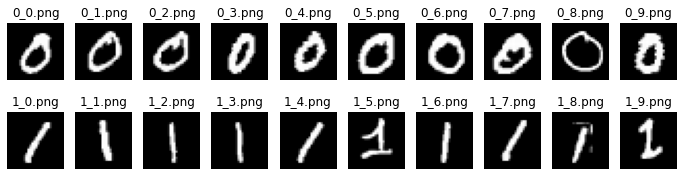

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion

### 1.3 Additional method(s)
Add your implementation and discussion

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

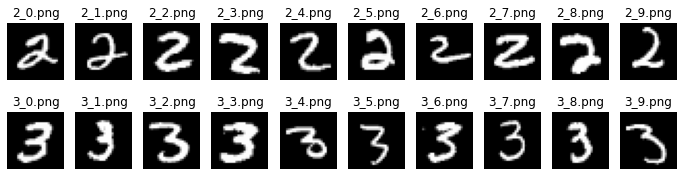

In [3]:
#  Load twos
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load threes
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
Add your implementations and discussions here

Let's have a look on all the digits and their contours. 

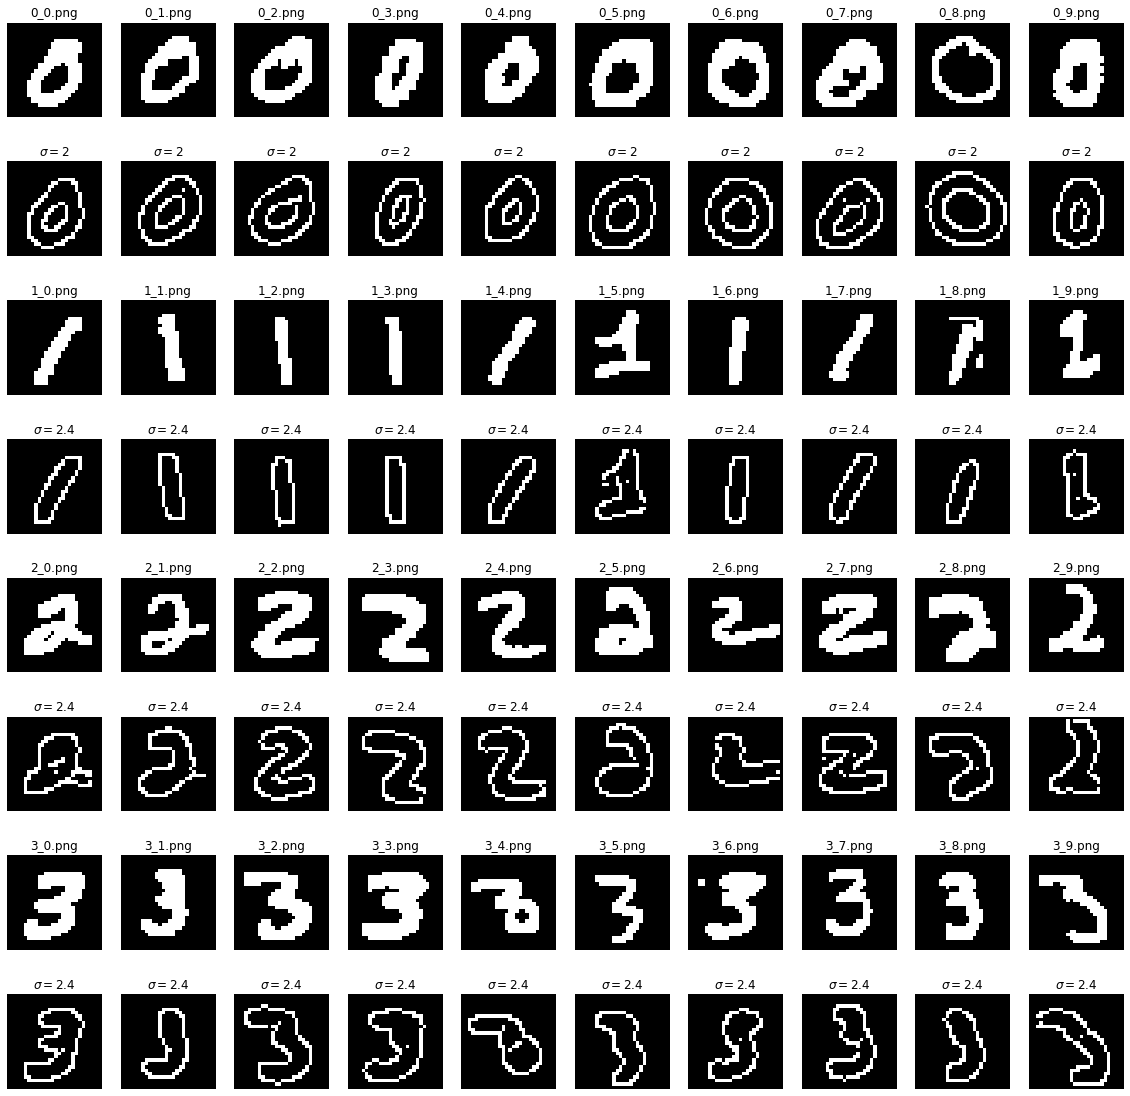

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature

zeros_im_filtres_contours=[] #contours of zeros images
ones_im_filtres_contours=[] #contours of ones images
twos_im_filtres_contours = []
threes_im_filtres_contours = []



# Plot images
fig, axes = plt.subplots(8, len(zeros_im), figsize=(20, 20))

for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    im = im.astype(bool).astype(int) #image binarization
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
    
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    im = im.astype(bool).astype(int)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.4$')

    
for ax, im, nm in zip(axes[4], twos_im, twos_names):
    im = im.astype(bool).astype(int)    
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[5], twos_im, twos_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    twos_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.4$')    
    
    
for ax, im, nm in zip(axes[6], threes_im, threes_names):
    im = im.astype(bool).astype(int)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[7], threes_im, threes_names):
    # Compute the Canny filter for two values of sigma

    edges = feature.canny(im,sigma=2.4)
    threes_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.4$')    
    
    
    
plt.show()

We can see on the plot above that the contours from the 2's and 3's look pretty similar. Could be hard to discrimate these two digits.

Using the same process as in part 1 here we compute the Fourier descriptors from the contours

In [7]:
## Fourier transform
from scipy.linalg import dft

def get_fourier_descriptors(contours, nb_descriptors = 2):
    """"
    Compute the nth first Fourier descriptor and return 
    the signals their DFT and the nth first amplitude of the Fourier descriptors
    
    """
    u_=[] 
    u_dft=[]
    
    for c in contours:
        u_+= [c[k,0]+c[k,1]*1j for k in range(len(c))]
        x=np.array([c[0,k]+c[1,k]*1j for k in range(len(c[0]))])
        m = dft(len(x))
        list_fourier = m.dot(x)
        u_dft +=[list_fourier[0:nb_descriptors]]
        amp = np.abs(np.array(u_dft))
    
    return u_, u_dft, amp

In [8]:
u_0, u_0_dft, amp0 = get_fourier_descriptors(zeros_im_filtres_contours)
u_1, u_1_dft, amp1 = get_fourier_descriptors(ones_im_filtres_contours)
u_2, u_2_dft, amp2 = get_fourier_descriptors(twos_im_filtres_contours)
u_3, u_3_dft, amp3 = get_fourier_descriptors(threes_im_filtres_contours)


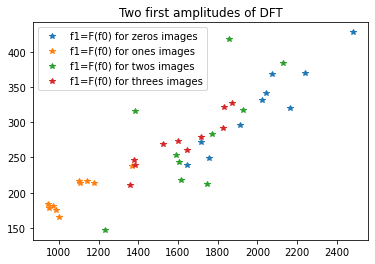

In [9]:
plt.plot(amp0[:,0],amp0[:,1],'*', label='f1=F(f0) for zeros images')
plt.plot(amp1[:,0],amp1[:,1],'*', label='f1=F(f0) for ones images')
plt.plot(amp2[:,0],amp2[:,1],'*', label='f1=F(f0) for twos images')
plt.plot(amp3[:,0],amp3[:,1],'*', label='f1=F(f0) for threes images')

plt.legend()
plt.title("Two first amplitudes of DFT")
plt.show()

As we can see by ploting the first twos amplitudes of the Fourier descriptors we can not discriminate the fourth different digits. It seems that the 0s and the 1s are still well separate but the 2s and 3s are not.

To bypass this problem we try to use more than two amplitude and then used a dimension reduction algotithm to compute a 2d feature vector. Then we can simply plot this 2d feature vector. We first try the TSNE algorithm which is a nonlinear dimensionality reduction technique with 3, 4, 6 and 10 amplitude before the reduction.

In [37]:
from sklearn.manifold import TSNE

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 3)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 3)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 3)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 3)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X3 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 4)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 4)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 4)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 4)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X4 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 6)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours,6)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 6)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 6)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X6 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 10)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 10)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 10)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 10)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X10 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)

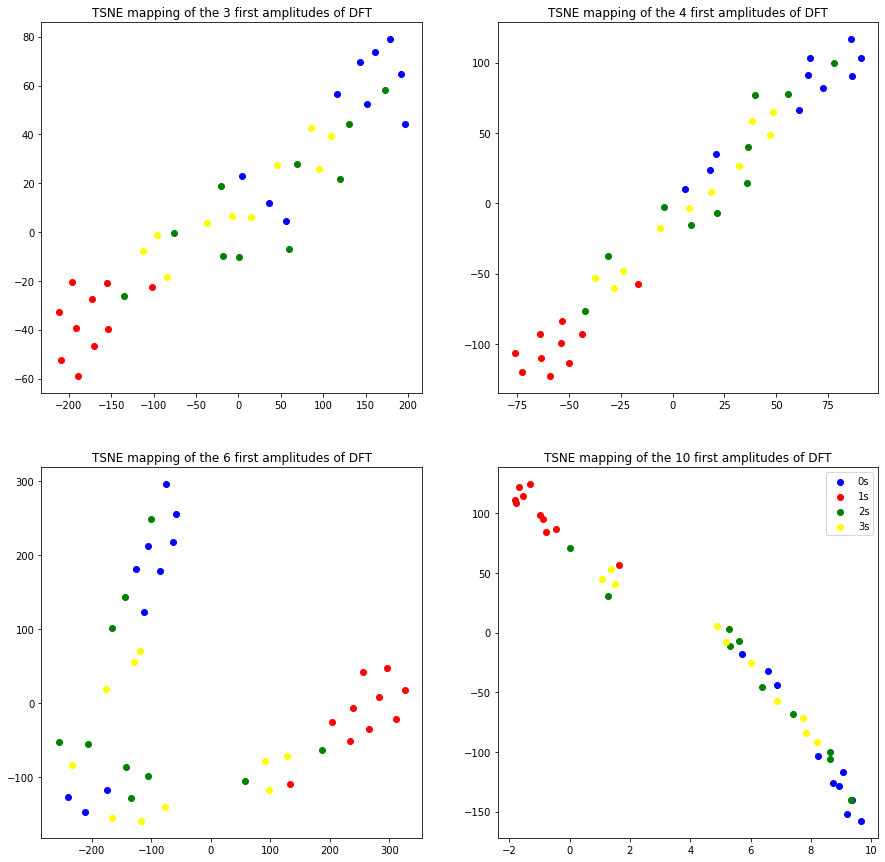

In [38]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X3[:10, 0], X3[:10, 1], c='blue', label = '0s')
ax1.scatter(X3[10:20, 0], X3[10:20, 1], c='red', label = '1s')
ax1.scatter(X3[20:30, 0], X3[20:30, 1], c='green', label = '2s')
ax1.scatter(X3[30:, 0], X3[30:, 1], c='yellow', label = '3s')
ax1.set_title('TSNE mapping of the 3 first amplitudes of DFT')


ax2.scatter(X4[:10, 0], X4[:10, 1], c='blue', label = '0s')
ax2.scatter(X4[10:20, 0], X4[10:20, 1], c='red', label = '1s')
ax2.scatter(X4[20:30, 0], X4[20:30, 1], c='green', label = '2s')
ax2.scatter(X4[30:, 0], X4[30:, 1], c='yellow', label = '3s')
ax2.set_title('TSNE mapping of the 4 first amplitudes of DFT')

ax3.scatter(X6[:10, 0], X6[:10, 1], c='blue', label = '0s')
ax3.scatter(X6[10:20, 0], X6[10:20, 1], c='red', label = '1s')
ax3.scatter(X6[20:30, 0], X6[20:30, 1], c='green', label = '2s')
ax3.scatter(X6[30:, 0], X6[30:, 1], c='yellow', label = '3s')
ax3.set_title('TSNE mapping of the 6 first amplitudes of DFT')


ax4.scatter(Xss[:10, 0], X10[:10, 1], c='blue', label = '0s')
ax4.scatter(Xss[10:20, 0], X10[10:20, 1], c='red', label = '1s')
ax4.scatter(Xss[20:30, 0], X10[20:30, 1], c='green', label = '2s')
ax4.scatter(Xss[30:, 0], X10[30:, 1], c='yellow', label = '3s')
ax4.set_title('TSNE mapping of the 10 first amplitudes of DFT')

plt.legend()
plt.show()


blabla

Let's now try with UMAP which is another algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. 

In [39]:
import umap

reducer = umap.UMAP()

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 3)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 3)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 3)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 3)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X3 = reducer.fit_transform(amps)

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 4)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 4)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 4)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 4)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X4 = reducer.fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 6)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours,6)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 6)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 6)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X6 = reducer.fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 10)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 10)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 10)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 10)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X10 = reducer.fit_transform(amps)



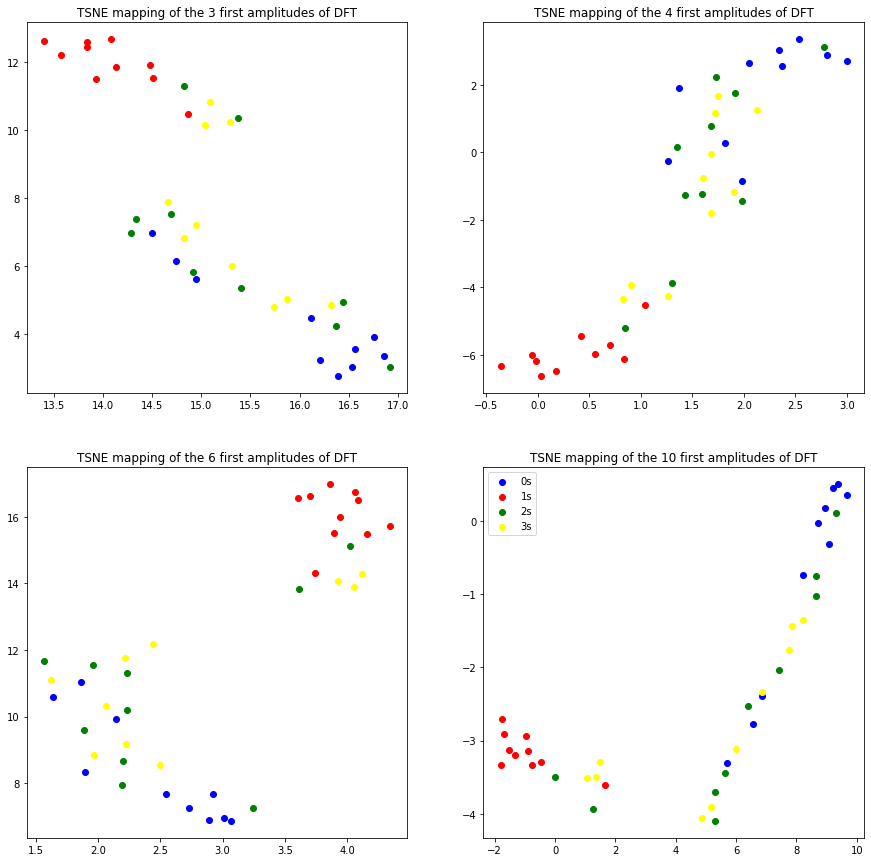

In [40]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X3[:10, 0], X3[:10, 1], c='blue', label = '0s')
ax1.scatter(X3[10:20, 0], X3[10:20, 1], c='red', label = '1s')
ax1.scatter(X3[20:30, 0], X3[20:30, 1], c='green', label = '2s')
ax1.scatter(X3[30:, 0], X3[30:, 1], c='yellow', label = '3s')
ax1.set_title('UMAP mapping of the 3 first amplitudes of DFT')


ax2.scatter(X4[:10, 0], X4[:10, 1], c='blue', label = '0s')
ax2.scatter(X4[10:20, 0], X4[10:20, 1], c='red', label = '1s')
ax2.scatter(X4[20:30, 0], X4[20:30, 1], c='green', label = '2s')
ax2.scatter(X4[30:, 0], X4[30:, 1], c='yellow', label = '3s')
ax2.set_title('UMAP mapping of the 4 first amplitudes of DFT')

ax3.scatter(X6[:10, 0], X6[:10, 1], c='blue', label = '0s')
ax3.scatter(X6[10:20, 0], X6[10:20, 1], c='red', label = '1s')
ax3.scatter(X6[20:30, 0], X6[20:30, 1], c='green', label = '2s')
ax3.scatter(X6[30:, 0], X6[30:, 1], c='yellow', label = '3s')
ax3.set_title('UMAP mapping of the 6 first amplitudes of DFT')


ax4.scatter(Xss[:10, 0], X10[:10, 1], c='blue', label = '0s')
ax4.scatter(Xss[10:20, 0], X10[10:20, 1], c='red', label = '1s')
ax4.scatter(Xss[20:30, 0], X10[20:30, 1], c='green', label = '2s')
ax4.scatter(Xss[30:, 0], X10[30:, 1], c='yellow', label = '3s')
ax4.set_title('UMAP mapping of the 10 first amplitudes of DFT')

plt.legend()
plt.show()

As expected we can see similar results than with t-sne method. 1s in red are the only digit that cluter quite well. Increasing the number of dft's amplitude before the dimension reduction does not help. 

We also try to use those dimension reduction algorithms directly on the image. First we have to flatten the image then reduce their dimensionality from 28*28 to 2.

In [41]:
zeros_im = zeros_im.reshape(10, 28*28)
ones_im = ones_im.reshape(10, 28*28)
twos_im = twos_im.reshape(10, 28*28)
threes_im = threes_im.reshape(10, 28*28)

Xu = reducer.fit_transform(np.concatenate([zeros_im, ones_im, twos_im, threes_im], 0))
Xt = TSNE(n_components=2, perplexity = 10).fit_transform(np.concatenate([zeros_im, ones_im, twos_im, threes_im], 0))

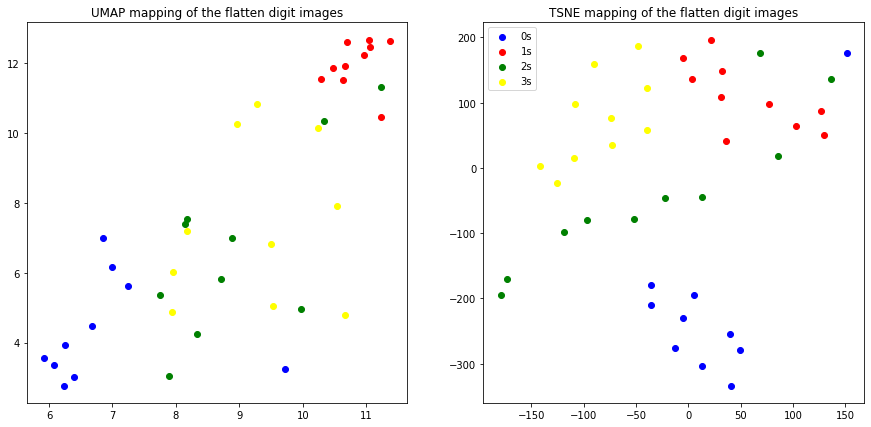

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.scatter(Xu[:10, 0], X3[:10, 1], c='blue', label = '0s')
ax1.scatter(Xu[10:20, 0], X3[10:20, 1], c='red', label = '1s')
ax1.scatter(Xu[20:30, 0], X3[20:30, 1], c='green', label = '2s')
ax1.scatter(Xu[30:, 0], X3[30:, 1], c='yellow', label = '3s')
ax1.set_title('UMAP mapping of the flatten digit images')


ax2.scatter(Xt[:10, 0], Xt[:10, 1], c='blue', label = '0s')
ax2.scatter(Xt[10:20, 0], Xt[10:20, 1], c='red', label = '1s')
ax2.scatter(Xt[20:30, 0], Xt[20:30, 1], c='green', label = '2s')
ax2.scatter(Xt[30:, 0], Xt[30:, 1], c='yellow', label = '3s')
ax2.set_title('TSNE mapping of the flatten digit images')

plt.legend()
plt.show()


As a conclusion we can say that with the dataset we had we did not were able to properly discrimante the four different digit. We guess that it should be doable but it seems that the Fourier Descriptors can't capture four different digit which are pretty similar. 